<a href="https://colab.research.google.com/github/HyeonjongJang/fashion_MNIST/blob/main/mnist1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**numpy, tensorflow, tensorflow, 그리고 keras.datasets 모듈 가져오기 위해 [1] 작성**

numpy 라이브러리 : 배열을 다루기 위한 기능을 제공

tensorflow 라이브러리 : 신경망을 구축하고 학습시키기 위한 API를 제공

tensorflow.keras.datasets 모듈 : fashion MNIST 데이터셋에 접근 위함

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

**TensorFlow의 Keras API를 사용하여 신경망 모델을 구축하기 위한 클래스, 함수 제공 **

tensorflow.keras.models.Sequential: 순차적으로 층을 쌓아가는 신경망 모델 제작

tensorflow.keras.layers.Dense: 전결합(fully connected) 층을 정의

tensorflow.keras.optimizers.Adam: Adam 최적화 알고리즘을 구현한 최적화 함수를 제공

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() : Fashion MNIST 데이터셋을 로드하고, (x_train, y_train)은 학습 데이터로, (x_test, y_test)는 테스트 데이터로 나눔.

x_train = x_train.reshape(60000,784) : 학습 데이터를 2차원 배열에서 1차원 배열로 (저차원으로) 변환 각 이미지는 28x28 픽셀의 2차원 형태이지만, 신경망에 입력하기 위해 784개의 픽셀을 가진 1차원 형태로 변환함.

x_test = x_test.reshape(10000,784) : 테스트 데이터도 동일하게 2차원 배열에서 1차원 배열로 변환.

x_train = x_train/255.0, x_test = x_test/255.0 : 픽셀 값의 범위를 0부터 255까지의 정수에서 0부터 1 사이의 실수로 정규화(normalize).

y_train = tf.keras.utils.to_categorical(y_train,10), y_test = tf.keras.utils.to_categorical(y_test,10) : 학습 데이터의 클래스 레이블을 원-핫 인코딩(one-hot encoding) 형태로 변환.

로드로 인한 다운로드 항목은 밑의 링크 참조.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train/255.0
x_test = x_test/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)


4422102/4422102 [==============================] - 0s 0us/step


d = 784,
히든 레이어 = 1024,
c (부류의 값) = 10

In [ ]:
n_input = 784
n_hidden = 1024
n_output = 10


mlp = Sequential() : Sequential 모델 객체 mlp를 생성.

mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer="zeros")) : 입력층과 은닉층 추가.

mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer="zeros")) : 출력층 추가.

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy']) : 모델을 컴파일. loss 인자는 손실 함수로 평균 제곱 오차(mean squared error)를 사용하며, 하이퍼 파라미터인 학습률은 0.001로 설정. metrics는 모델의 평가 지표로 정확도(accuracy)를 사용합니다.

hist = mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2) : x_train과 y_train라는 학습 데이터를 통해 모델을 학습. batch_size는 한 번의 반복에서 처리되는 샘플의 개수이며, epochs는 전체 데이터셋을 통해 모델이 학습되는 횟수.

res = mlp.evaluate(x_test, y_test, verbose=0) : 학습된 모델을 테스트 데이터로 평가. x_test와 y_test는 테스트 데이터.

print("Accuracy is", res[1]*100) : 모델의 정확도를 출력합니다. res[1]은 평가 결과에서 정확도에 해당하는 값을 나타내며, 100을 곱하여 백분율로 표현.

In [ ]:
mlp = Sequential()
mlp.add(Dense(units = n_hidden, activation='tanh', input_shape=(n_input, ), 
              kernel_initializer = 'random_uniform', bias_initializer="zeros"))
mlp.add(Dense(units = n_output, activation='tanh', kernel_initializer = 'random_uniform', bias_initializer="zeros"))
mlp.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])
hist = mlp.fit(x_train, y_train, batch_size = 128, epochs = 30, validation_data = (x_test, y_test), verbose = 2)
res = mlp.evaluate(x_test, y_test, verbose=0)
print("Accuracy is", res[1]*100)


Epoch 1/30
469/469 - 12s - loss: 0.0671 - accuracy: 0.7225 - val_loss: 0.0330 - val_accuracy: 0.8241 - 12s/epoch - 26ms/step
Epoch 2/30
469/469 - 9s - loss: 0.0298 - accuracy: 0.8449 - val_loss: 0.0295 - val_accuracy: 0.8393 - 9s/epoch - 20ms/step
Epoch 3/30
469/469 - 8s - loss: 0.0271 - accuracy: 0.8577 - val_loss: 0.0274 - val_accuracy: 0.8468 - 8s/epoch - 18ms/step
Epoch 4/30
469/469 - 11s - loss: 0.0247 - accuracy: 0.8676 - val_loss: 0.0249 - val_accuracy: 0.8574 - 11s/epoch - 24ms/step
Epoch 5/30
469/469 - 12s - loss: 0.0235 - accuracy: 0.8740 - val_loss: 0.0249 - val_accuracy: 0.8624 - 12s/epoch - 26ms/step
Epoch 6/30
469/469 - 12s - loss: 0.0223 - accuracy: 0.8810 - val_loss: 0.0237 - val_accuracy: 0.8680 - 12s/epoch - 25ms/step
Epoch 7/30
469/469 - 12s - loss: 0.0214 - accuracy: 0.8850 - val_loss: 0.0239 - val_accuracy: 0.8693 - 12s/epoch - 25ms/step
Epoch 8/30
469/469 - 8s - loss: 0.0208 - accuracy: 0.8882 - val_loss: 0.0229 - val_accuracy: 0.8681 - 8s/epoch - 17ms/step
Epoch 

plt.plot(hist.history['accuracy']) : 학습 과정에서 기록된 훈련 데이터의 정확도 값을 선 그래프로 제작. hist.history['accuracy']는 각 epoch마다 기록된 훈련 데이터의 정확도 값을 나타냄.

plt.plot(hist.history['val_accuracy']) : 학습 과정에서 기록된 검증 데이터의 정확도 값을 선 그래프로 제작.

plt.title('Model Accuracy') : 그래프의 제목을 설정

plt.ylabel('Accuracy') : y축의 레이블을 'Accuracy'로 설정합니다.

plt.xlabel('Epoch') : x축의 레이블을 'Epoch'로 설정합니다.

plt.legend(['Train', 'Validation'], loc='upper right') : 그래프에 범례를 추가. 'Train'은 훈련 데이터의 정확도이며, 'Validation'은 검증 데이터의 정확도. upper right'로 설정합니다.

t.grid (): 그래프에 격자 라인을 추가.

plt.show (): 그래프를 표시.

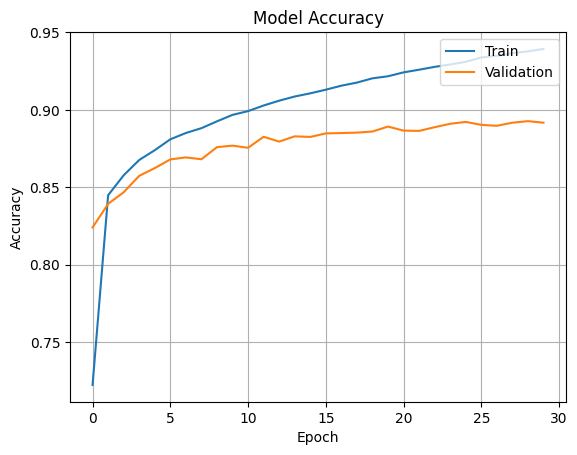

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'],loc='upper right')
plt.grid()
plt.show()


방금 문제와 흡사함.

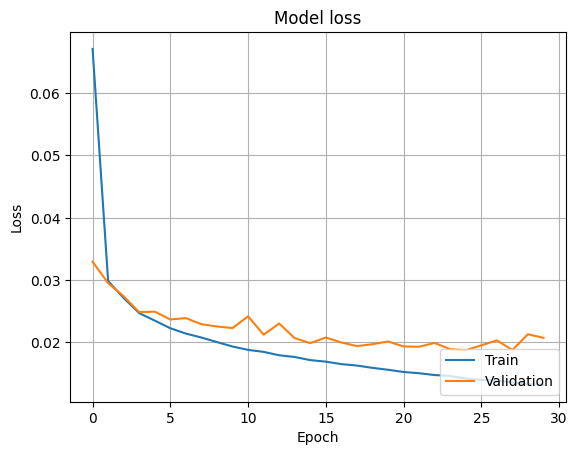

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'],loc='lower right')
plt.grid()
plt.show()
